In [73]:
target_url = 'https://raw.githubusercontent.com/Cosmic-rare/result-database-jupyter/main/targets/target.jpg'

In [27]:
import os
from PIL import Image
import pyocr
import pyocr.builders
import requests
import io
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
def openImg(url):
  return Image.open(io.BytesIO(requests.get(url).content))

In [4]:
path_tesseract = "C:\\Program Files\\Tesseract-OCR"
if path_tesseract not in os.environ["PATH"].split(os.pathsep):
    os.environ["PATH"] += os.pathsep + path_tesseract

tools = pyocr.get_available_tools()
tool = tools[0]

In [74]:
img = openImg(target_url)
rgb_img = img.convert('RGB')
size = rgb_img.size

In [75]:
crop_img = rgb_img.crop([0, size[1] / 2, size[0] / 4 * 3, size[1] / 8 * 7])
# crop_img = rgb_img
crop_size = crop_img.size

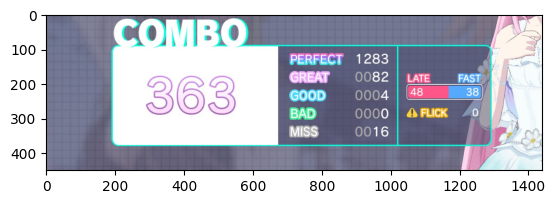

In [76]:
# img2 = Image.new('RGBA', crop_size)

# border = 215

# for x in range(crop_size[0]):
#   for y in range(crop_size[1]):
#     r, g, b = crop_img.getpixel((x, y))

#     if border<r and border<g and border<b :
#         a = 0
#     else:
#         a = 225

#     img2.putpixel((x, y), (a, a, a, 255))

img2 = crop_img

plt.imshow(img2)

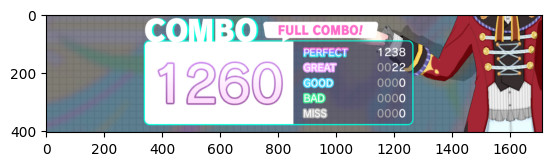

In [72]:
plt.imshow(img2)

In [32]:
builder = pyocr.builders.WordBoxBuilder (tesseract_layout=11)
# builder.tesseract_configs.append("-c")
# builder.tesseract_configs.append('tessedit_char_whitelist=""')
result = tool.image_to_string(crop_img, lang="eng", builder=builder)

In [33]:
imgimg = np.array(crop_img)

for box in result:
    cv2.rectangle(imgimg, box.position[0], box.position[1], (0, 0, 255), 2)
    print("word: {}, pos: {}".format(box.content, box.position))

word: ALL, pos: ((752, 29), (822, 45))
word: PERPEUI::, pos: ((834, 28), (1016, 46))
word: Wy, pos: ((504, 23), (542, 66))
word: PERFECT, pos: ((803, 82), (941, 109))
word: 1521, pos: ((974, 84), (1048, 109))
word: FAST, pos: ((1233, 136), (1288, 156))
word: GOOD, pos: ((806, 178), (892, 201))
word: IK®), pos: ((428, 165), (547, 237))
word: D, pos: ((557, 165), (624, 237))
word: ii, pos: ((648, 164), (684, 236))
word: BAD, pos: ((806, 223), (867, 247))
word: O, pos: ((1036, 222), (1054, 247))
word: |, pos: ((1071, 216), (1090, 259))
word: FLICK, pos: ((1100, 220), (1205, 247))


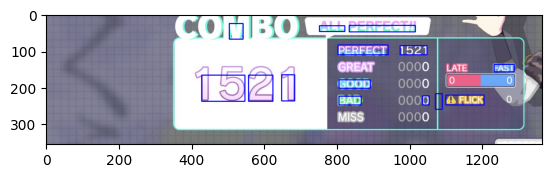

In [34]:
plt.imshow(imgimg)